In [1]:
import geojson
import matplotlib.pyplot as plt
import json
import numpy as np
import pandas as pd
from PIL import Image
import rasterio as rs
from rasterio.plot import show
from rasterio import warp
from skimage import morphology
from skimage.feature import blob_doh

In [72]:
def pixels_to_coords(x, y, src_img):
    lon, lat = warp.transform(src_img.crs, rs.crs.CRS.from_epsg(4326), [src_img.xy(y, x)[0]], [src_img.xy(y, x)[1]])
    return lon[0], lat[0]

def coords_to_pixels(lon, lat, src_img):
    x, y = warp.transform(rs.crs.CRS.from_epsg(4326), src_img.crs, [lon],  [lat])
    pixel_y, pixel_x = src_img.index(x, y)
    return pixel_x[0], pixel_y[0]

In [3]:
source = rs.open('/Users/ckruse/Downloads/pred_2021-01-13T02_46_09.279403.tif')

In [61]:
source.bounds

BoundingBox(left=499980.0, bottom=6190200.0, right=609780.0, top=6300000.0)

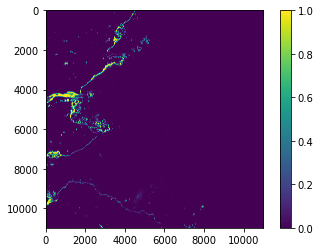

In [88]:
data = source.read(1)
plastics = data == 3
plt.imshow(plastics)
plt.colorbar()
plt.show()

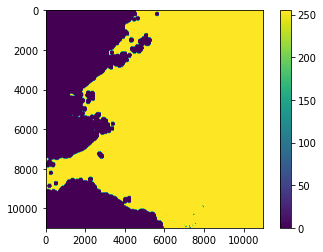

In [34]:
mask = rs.open('/Users/ckruse/Downloads/mask.tif')
mask = mask.read(1)
plt.imshow(mask)
plt.colorbar()
plt.show()

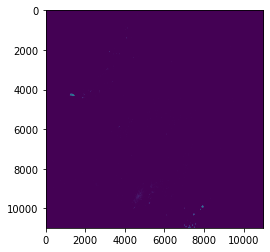

In [33]:
masked = np.copy()
masked[mask == 0] = 0
plt.imshow(masked)

In [58]:
plastics_y, plastics_x = np.where(masked > 0)

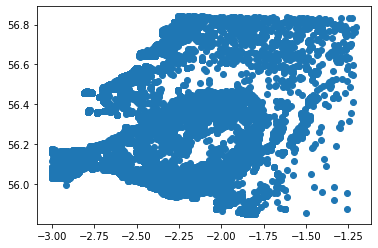

In [79]:
plastics_coords = []
for point_x, point_y in zip(plastics_x, plastics_y):
    plastics_coords.append(pixels_to_coords(point_x, point_y, source))
lats = []
lons = []
for point in plastics_coords:
    lons.append(point[0])
    lats.append(point[1])
plt.scatter(lons, lats)
plt.show()

In [91]:
blue_fluorite = ['#291b32', '#2a1b34', '#2b1b34', '#2d1c36', '#2f1c38', '#301c39', '#301d3a', '#321d3b', '#331d3d', '#351d3f', '#351e40', '#371e41', '#381e43', '#3a1e45', '#3b1f45', '#3c1f46', '#3e1f48', '#3f1f4a', '#401f4c', '#42204d', '#43204e', '#44204f', '#462051', '#472052', '#482054', '#4a2056', '#4a2157', '#4c2158', '#4e215a', '#4f215b', '#50215d', '#52215e', '#532160', '#552162', '#552263', '#562264', '#582265', '#592267', '#5b2268', '#5c226b', '#5e226c', '#5f226e', '#60226f', '#622271', '#632272', '#642274', '#662276', '#672277', '#692278', '#6a227a', '#6c227b', '#6e227d', '#6e237e', '#6f247f', '#702480', '#712581', '#722681', '#732683', '#742783', '#752884', '#762985', '#772987', '#792a87', '#792b88', '#7a2c89', '#7b2c8a', '#7c2d8a', '#7d2d8c', '#7e2e8d', '#7f2f8d', '#80308e', '#813190', '#823191', '#833292', '#843292', '#863393', '#863494', '#873595', '#893596', '#8a3697', '#8b3798', '#8b3899', '#8c389a', '#8e399b', '#8e3a9c', '#8f3b9c', '#8f3d9d', '#8f3e9e', '#903f9e', '#90419e', '#90439f', '#9044a0', '#9046a0', '#9047a1', '#9049a1', '#914aa2', '#914ca2', '#914ca3', '#914ea3', '#9150a4', '#9151a5', '#9153a5', '#9154a6', '#9156a6', '#9157a7', '#9258a7', '#9259a8', '#925aa8', '#925ba9', '#925da9', '#925faa', '#9260ab', '#9260ab', '#9263ac', '#9264ac', '#9265ad', '#9266ae', '#9268ae', '#9269ae', '#926aaf', '#926bb0', '#926cb0', '#926eb1', '#926fb1', '#9270b2', '#9271b2', '#9273b3', '#9274b3', '#9275b4', '#9277b5', '#9277b5', '#9278b6', '#927ab6', '#927bb7', '#927cb7', '#927eb8', '#927fb8', '#9280b9', '#9281ba', '#9282ba', '#9284bb', '#9285bb', '#9285bc', '#9187bc', '#9188bd', '#918abd', '#918bbe', '#918cbf', '#918dbf', '#918ec0', '#918fc0', '#9191c1', '#9092c2', '#9094c2', '#9094c2', '#9095c3', '#9096c3', '#8f99c4', '#8f9ac5', '#8f9ac5', '#8f9bc6', '#8f9cc6', '#8f9dc7', '#8e9fc8', '#8ea0c8', '#8ea2c9', '#8ea3c9', '#8da5ca', '#8da5ca', '#8da6cb', '#8da7cb', '#8ca9cc', '#8caacc', '#8caccd', '#8bacce', '#8badce', '#8baecf', '#8ab0d0', '#8ab2d0', '#8ab2d1', '#8ab4d1', '#89b4d1', '#89b5d2', '#89b7d2', '#88b8d3', '#88bad4', '#87bad4', '#87bbd5', '#86bdd6', '#86bed6', '#86c0d7', '#85c0d7', '#85c1d8', '#84c3d8', '#84c4d9', '#83c5d9', '#83c6da', '#82c8da', '#82c8db', '#81cadc', '#81cbdc', '#80ccdd', '#81cddd', '#84cfdd', '#85cfdd', '#87d0dd', '#8ad0de', '#8dd1de', '#8fd2de', '#90d2de', '#92d4de', '#95d5de', '#97d5de', '#98d6de', '#9bd7de', '#9dd7df', '#a0d8df', '#a1d9df', '#a2dadf', '#a5dadf', '#a7dbdf', '#aadcdf', '#abdddf', '#acdde0', '#afdfe0', '#b1dfe0', '#b3e0e0', '#b4e1e0', '#b7e2e0', '#bae2e1', '#bae3e1', '#bee3e2', '#c0e4e3', '#c1e5e3', '#c4e6e3', '#c6e6e4', '#c8e7e4', '#cbe7e5', '#cde8e5', '#cee9e6', '#d2e9e7', '#d3eae7', '#d5eae7', '#d8ebe8', '#d9ece8', '#dcece9', '#deedea', '#dfeeea', '#e2eeea', '#e5efeb', '#e6f0eb', '#e9f0ec', '#ebf1ed', '#ecf2ed', '#eff3ee', '#f1f3ee']


In [99]:
config = {
  "version": "v1",
  "config": {
    "visState": {
      "filters": [],
      "layers": [
        {
          "id": "r4ec9ws",
          "type": "hexagon",
          "config": {
            "dataId": "Plastics",
            "label": "Point",
            "color": [
              136,
              87,
              44
            ],
            "columns": {
              "lat": "lat",
              "lng": "lon"
            },
            "isVisible": True,
            "visConfig": {
              "opacity": 0.8,
              "worldUnitSize": 0.25,
              "resolution": 8,
              "colorRange": {
                "name": "Global Warming",
                "type": "sequential",
                "category": "Uber",
                "colors": [
                  "#5A1846",
                  "#900C3F",
                  "#C70039",
                  "#E3611C",
                  "#F1920E",
                  "#FFC300"
                ]
              },
              "coverage": 1,
              "sizeRange": [
                0,
                500
              ],
              "percentile": [
                0,
                100
              ],
              "elevationPercentile": [
                0,
                100
              ],
              "elevationScale": 5,
              "colorAggregation": "count",
              "sizeAggregation": "count",
              "enable3d": False
            },
            "hidden": False,
            "textLabel": [
              {
                "field": None,
                "color": [
                  255,
                  255,
                  255
                ],
                "size": 18,
                "offset": [
                  0,
                  0
                ],
                "anchor": "start",
                "alignment": "center"
              }
            ]
          },
          "visualChannels": {
            "colorField": None,
            "colorScale": "quantile",
            "sizeField": None,
            "sizeScale": "linear"
          }
        },
        {
          "id": "xixvkww",
          "type": "heatmap",
          "config": {
            "dataId": "Plastics",
            "label": "heatmap",
            "color": [
              18,
              147,
              154
            ],
            "columns": {
              "lat": "lat",
              "lng": "lon"
            },
            "isVisible": False,
            "visConfig": {
              "opacity": 0.8,
              "colorRange": {
                "name": "Uber Viz Diverging 1.5",
                "type": "diverging",
                "category": "Uber",
                "colors": [
                  "#00939C",
                  "#5DBABF",
                  "#BAE1E2",
                  "#F8C0AA",
                  "#DD7755",
                  "#C22E00"
                ]
              },
              "radius": 2
            },
            "hidden": False,
            "textLabel": [
              {
                "field": None,
                "color": [
                  255,
                  255,
                  255
                ],
                "size": 18,
                "offset": [
                  0,
                  0
                ],
                "anchor": "start",
                "alignment": "center"
              }
            ]
          },
          "visualChannels": {
            "weightField": None,
            "weightScale": "linear"
          }
        }
      ],
      "interactionConfig": {
        "tooltip": {
          "fieldsToShow": {
            "Plastics": []
          },
          "compareMode": False,
          "compareType": "absolute",
          "enabled": True
        },
        "brush": {
          "size": 0.5,
          "enabled": False
        },
        "geocoder": {
          "enabled": False
        },
        "coordinate": {
          "enabled": False
        }
      },
      "layerBlending": "normal",
      "splitMaps": [],
      "animationConfig": {
        "currentTime": None,
        "speed": 1
      }
    },
    "mapState": {
      "bearing": 0,
      "dragRotate": False,
      "latitude": 56.341197534212334,
      "longitude": -2.1791467878929587,
      "pitch": 0,
      "zoom": 8.465479626396862,
      "isSplit": False
    },
    "mapStyle": {
      "styleType": "dark",
      "topLayerGroups": {},
      "visibleLayerGroups": {
        "label": False,
        "road": False,
        "border": False,
        "building": False,
        "water": True,
        "land": True,
        "3d building": False
      },
      "threeDBuildingColor": [
        9.665468314072013,
        17.18305478057247,
        31.1442867897876
      ],
      "mapStyles": {}
    }
  }
}

In [100]:
from keplergl import KeplerGl
plastic_map = KeplerGl(height=800, data={"Plastics": pd.DataFrame(plastics_coords, columns=['lon', 'lat'])}, config=config)
plastic_map

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': 'r4ec9ws', 'type': …

In [90]:
plastic_map.save_to_html(file_name='/Users/ckruse/Downloads/plastics_viz.html')

Map saved to /Users/ckruse/Downloads/plastics_viz.html!
